In [1]:
!pip install EMD-signal
!pip install vnstock

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import PyEMD as pe
from vnstock import *

Observations:  1629
            Open  High   Low  Close   Volume Ticker
Time                                               
2017-06-02  3230  3330  3200   3280   411631    VND
2017-06-05  3320  3370  3270   3280   671582    VND
2017-06-06  3280  3320  3270   3320   174560    VND
2017-06-07  3320  3610  3320   3590  2332950    VND
2017-06-08  3640  3640  3510   3540   467477    VND
2017-06-09  3520  3660  3520   3560   726174    VND


<Axes: xlabel='Time'>

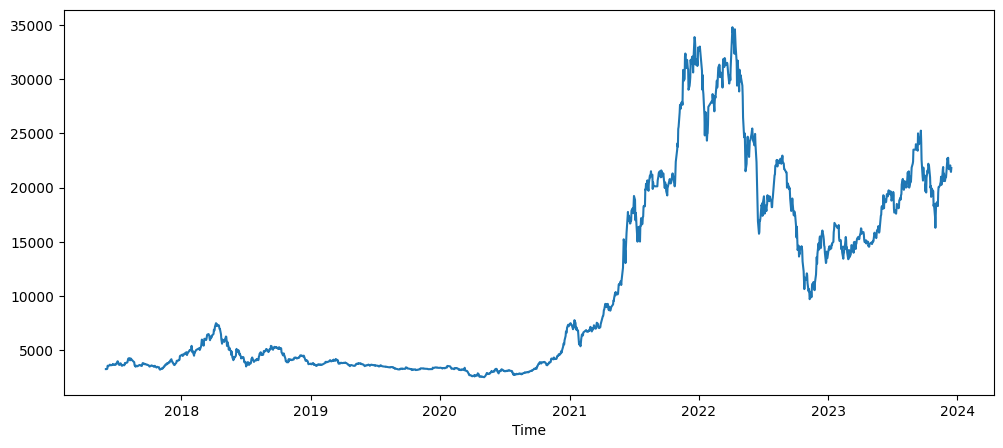

In [3]:
# Import data
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
print(pd.DataFrame(VND.head(6)))
train_dates = VND.index
plt.figure(figsize=(12, 5))
VND["Close"].plot()

In [4]:
VND = VND.reset_index(drop = True)
df = VND['Close']
df

0        3280
1        3280
2        3320
3        3590
4        3540
        ...  
1624    21950
1625    22050
1626    21600
1627    21450
1628    21800
Name: Close, Length: 1629, dtype: int64

In [5]:
from PyEMD import EMD, CEEMDAN

In [6]:
#ceemdan = CEEMDAN(range_thr=0.001, total_power_thr=0.01)
ceemdan = CEEMDAN(epsilon=0.005, range_thr = 0.005)
ceemdan.noise_seed(seed = 1)
cIMFs = ceemdan.ceemdan(S=np.array(df.values), T= np.array(df.index))

In [7]:
pd.DataFrame(cIMFs.T, columns = ["IMF"+str(i+1) for i in range(cIMFs.shape[0])])

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6,IMF7
0,-45.793487,-55.077449,-60.721015,-87.251699,73.004286,-657.359030,4113.198394
1,-29.394342,-64.807423,-69.000897,-89.792806,88.123854,-665.361652,4110.233265
2,-60.521464,-25.706900,-48.380470,-83.669122,104.082246,-673.082455,4107.278164
3,85.227708,41.416746,-10.767431,-70.509538,120.816487,-680.517043,4104.333071
4,-21.401641,33.995165,27.980772,-52.558462,138.247220,-687.661019,4101.397965
...,...,...,...,...,...,...,...
1624,164.330695,-553.214054,-42.129070,3030.530073,-2309.543674,4278.001644,17382.024387
1625,288.306510,-518.767780,-109.073546,3047.823428,-2309.810340,4272.124884,17379.396845
1626,-167.023518,-468.526841,-126.661472,3026.110174,-2306.862019,4266.099938,17376.863738
1627,-322.859110,-437.981109,-86.328036,2963.576313,-2300.770975,4259.938107,17374.424811


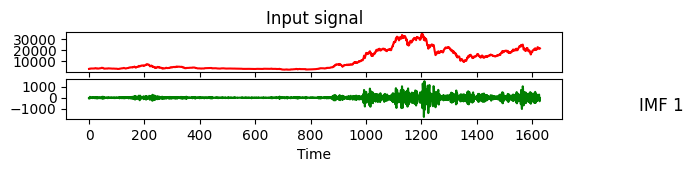

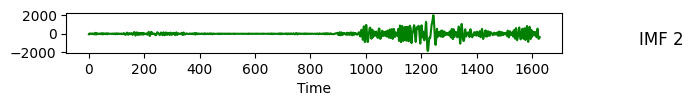

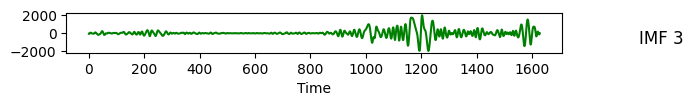

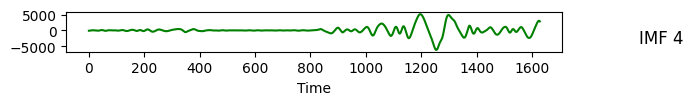

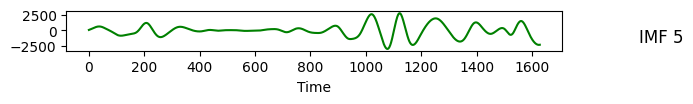

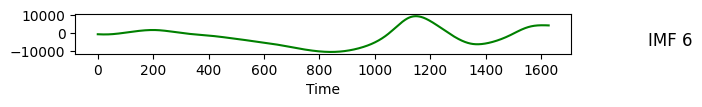

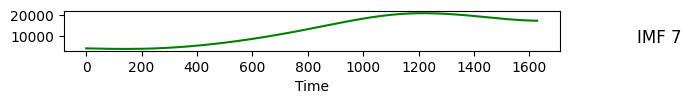

In [8]:
N = cIMFs.shape[0]+1
# Plot results
plt.subplot(N,1,1)
plt.plot(df.index, df.values, 'r')
plt.title("Input signal")
plt.xlabel("Time")

for n, imf in enumerate(cIMFs):
  plt.subplot(N,1,n+2)
  plt.plot(df.index, imf, 'g')
  plt.title("IMF "+str(n+1), x=1.2, y = 0)
  plt.xlabel("Time")
  plt.show()

In [9]:
# Tính residue
scIMF = cIMFs.sum(axis = 0).reshape(-1, 1)
residue = (np.array(df)-cIMFs.sum(axis = 0)).reshape(-1,1)

print("sIMF:", scIMF.shape)
print("Residue:", residue.shape)

sIMF: (1629, 1)
Residue: (1629, 1)


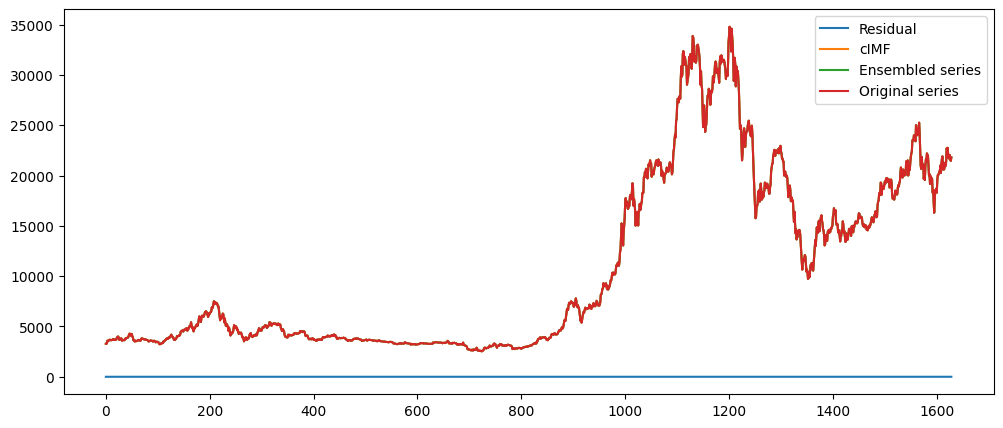

In [10]:
plt.figure(figsize=(12,5))
plt.plot(range(0,len(df)), residue)
plt.plot(range(0,len(df)), scIMF)
plt.plot(range(0,len(df)), scIMF+residue)
plt.plot(df)
plt.legend(["Residual", "cIMF", "Ensembled series", "Original series"])

plt.show()

In [11]:
# load các thư viện cần thiết
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler

In [12]:
# Scale data to 0-1
scaler = MinMaxScaler(feature_range=(0,1))
def Scaling (data):
    IMFscale = scaler.fit_transform(np.array(data))

    return IMFscale
cIMFs_t = cIMFs.T
IMFscale = Scaling(cIMFs_t)

In [13]:
print(IMFscale.shape)

(1629, 7)


(1629, 7)
Train:  (1303, 7)
Test:  (326, 7)


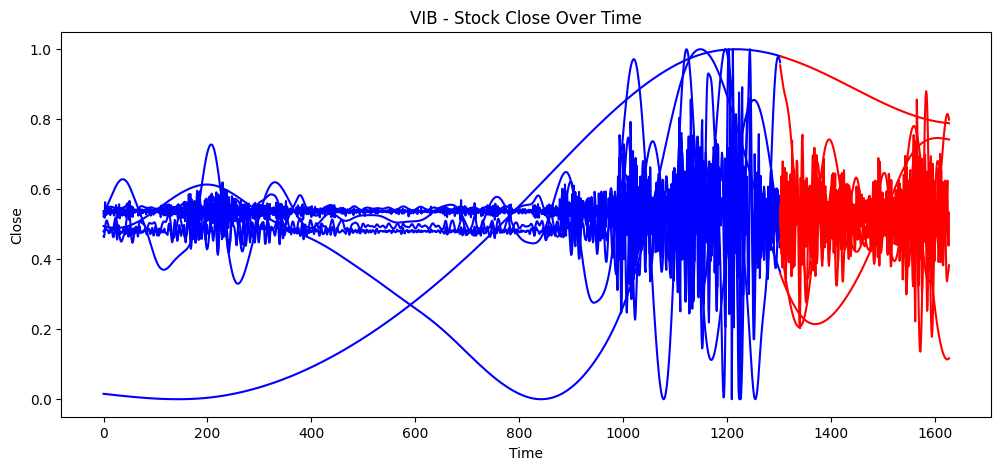

In [14]:
print(IMFscale.shape)
# Chia train test
train_size = int(0.8*IMFscale.shape[0])
test_size = int(0.2*IMFscale.shape[0])
train_data = IMFscale[:train_size]
test_data = IMFscale[train_size:]

print("Train: ", train_data.shape)
print("Test: ", test_data.shape)

# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b')
plt.plot(range(train_size-1,  train_size+test_size), test_data, linestyle='-',  color='r')

plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

In [15]:
# Train X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly

trainX = []
trainY = []

n_past = 30
n_future = 1

for i in range(n_past, len(train_data) - n_future + 1):
    past_sequence = train_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = train_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    trainX.append(past_sequence)
    trainY.append(future_sequence)

trainX, trainY = np.array(trainX), np.array(trainY)
trainY = trainY.reshape(trainY.shape[0], trainY.shape[2])

print("X train: ", trainX.shape)
print("Y train: ", trainY.shape)

X train:  (1273, 30, 7)
Y train:  (1273, 7)


In [16]:
# Test X and Y
# For each SAMPLE, we have a matrix of (1, 15, 8)
# consisting of one target, 15 days to look back and 8 features
###===
# For each LABEL, we have a matrix of (1, 8)
# consisting of one target and 8 features
###==
# LSTM is to be conducted parallelly
testX = []
testY = []

for i in range(n_past, len(test_data) - n_future + 1):
    past_sequence = test_data[i - n_past:i, :]  # Exclude the first column ("Close") for trainX
    future_sequence = test_data[i + n_future - 1: i + n_future, :]  # Use the "Close" column for trainY

    testX.append(past_sequence)
    testY.append(future_sequence)

testX, testY = np.array(testX), np.array(testY)
testY = testY.reshape(testY.shape[0], testY.shape[2])

print("X test: ", testX.shape)
print("Y test: ", testY.shape)

X test:  (296, 30, 7)
Y test:  (296, 7)


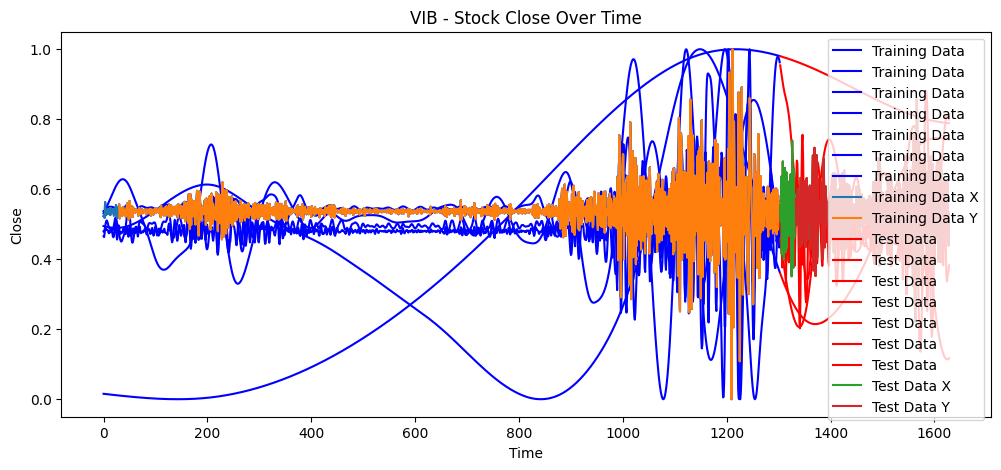

In [17]:
# Plotting both training and test data on the same chart
plt.figure(figsize=(12,5))

plt.plot(range(train_size), train_data, linestyle='-', color='b', label='Training Data')
plt.plot(range(train_size-n_past), trainX[:,0,0], linestyle='-', label='Training Data X')
plt.plot(range(n_past,train_size), trainY[:,0], linestyle='-', label='Training Data Y')
plt.plot(range(train_size, train_size+test_size+1), test_data, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size, train_size+test_size-n_past+1), testX[:,0,0], linestyle='-',  label='Test Data X')
plt.plot(range(train_size+n_past, train_size+test_size+1), testY[:,0], linestyle='-', label='Test Data Y')


plt.title('VIB - Stock Close Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()
plt.show()

In [39]:
# Tạo model lstm cho việc training
## kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01),
               ##bias_regularizer=l2(0.01),
model = Sequential()
model.add(LSTM(64, activation='relu',
               kernel_regularizer=l2(0.01),
               bias_regularizer=l2(0.01),
               recurrent_regularizer=l2(0.01),
               input_shape=(trainX.shape[1], trainX.shape[2]),

               return_sequences=True))
model.add(LSTM(32, activation='relu',
               kernel_regularizer=l2(0.01),
               return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainX.shape[2]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 64)            18432     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 31079 (121.40 KB)
Trainable params: 31079 (121.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
history = model.fit(trainX, trainY,epochs = 60, batch_size = 4, validation_split = 0.1, verbose=1)

Epoch 1/60
287/287 [==============================] - 12s 24ms/step - loss: 0.8343 - val_loss: 0.4191
Epoch 2/60
287/287 [==============================] - 8s 27ms/step - loss: 0.2810 - val_loss: 0.2219
Epoch 3/60
287/287 [==============================] - 7s 23ms/step - loss: 0.1339 - val_loss: 0.1182
Epoch 4/60
287/287 [==============================] - 7s 26ms/step - loss: 0.0607 - val_loss: 0.0873
Epoch 5/60
287/287 [==============================] - 7s 23ms/step - loss: 0.0291 - val_loss: 0.0669
Epoch 6/60
287/287 [==============================] - 8s 26ms/step - loss: 0.0172 - val_loss: 0.0482
Epoch 7/60
287/287 [==============================] - 7s 24ms/step - loss: 0.0134 - val_loss: 0.0493
Epoch 8/60
287/287 [==============================] - 10s 34ms/step - loss: 0.0118 - val_loss: 0.0535
Epoch 9/60
287/287 [==============================] - 7s 23ms/step - loss: 0.0115 - val_loss: 0.0479
Epoch 10/60
287/287 [==============================] - 7s 26ms/step - loss: 0.0119 - val_

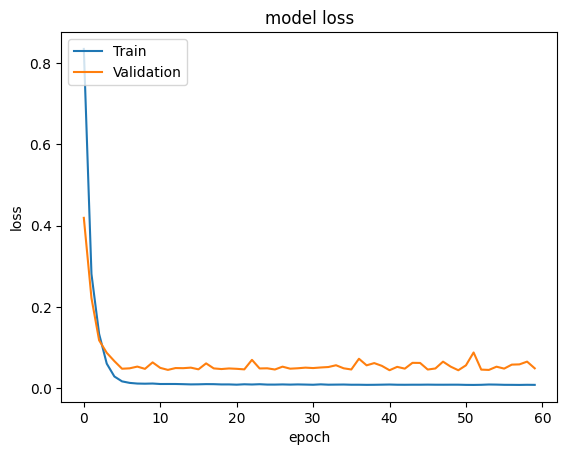

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
prediction = model.predict(testX)
prediction_copies = np.repeat(prediction, train_data.shape[1], axis=-1)
print(prediction_copies.shape)
y_pred_future = scaler.inverse_transform(prediction)[:]
print(y_pred_future.shape)

10/10 [==============================] - 0s 9ms/step
(296, 49)
(296, 7)


In [43]:
train_back = scaler.inverse_transform(train_data)
test_back = scaler.inverse_transform(test_data)

In [44]:
train_sum = train_back.sum(axis = 1).reshape(-1, 1)
test_sum = test_back.sum(axis = 1).reshape(-1, 1)
pred_sum = y_pred_future.sum(axis=1).reshape(-1, 1)


print (train_sum.shape)
print(test_sum.shape)
print(pred_sum.shape)
print(pred_sum)

(1303, 1)
(326, 1)
(296, 1)
[[21731.375]
 [21641.293]
 [21546.305]
 [21457.152]
 [21352.305]
 [21245.611]
 [21147.848]
 [21051.023]
 [20954.477]
 [20866.61 ]
 [20779.879]
 [20686.66 ]
 [20576.47 ]
 [20476.475]
 [20370.193]
 [20272.895]
 [20175.055]
 [20064.934]
 [19955.596]
 [19850.717]
 [19740.639]
 [19634.203]
 [19514.863]
 [19387.   ]
 [19285.355]
 [19179.582]
 [19064.074]
 [18960.121]
 [18848.459]
 [18745.61 ]
 [18645.715]
 [18558.354]
 [18474.59 ]
 [18394.285]
 [18317.771]
 [18243.527]
 [18163.436]
 [18074.62 ]
 [17986.824]
 [17896.479]
 [17816.322]
 [17745.168]
 [17677.473]
 [17619.969]
 [17573.215]
 [17533.453]
 [17493.777]
 [17452.826]
 [17422.549]
 [17400.3  ]
 [17377.684]
 [17361.795]
 [17359.098]
 [17356.56 ]
 [17364.846]
 [17382.447]
 [17402.816]
 [17428.266]
 [17455.748]
 [17473.336]
 [17485.234]
 [17497.41 ]
 [17509.422]
 [17521.445]
 [17535.227]
 [17531.354]
 [17524.873]
 [17520.395]
 [17499.451]
 [17464.83 ]
 [17430.57 ]
 [17393.219]
 [17336.098]
 [17284.605]
 [17233.53

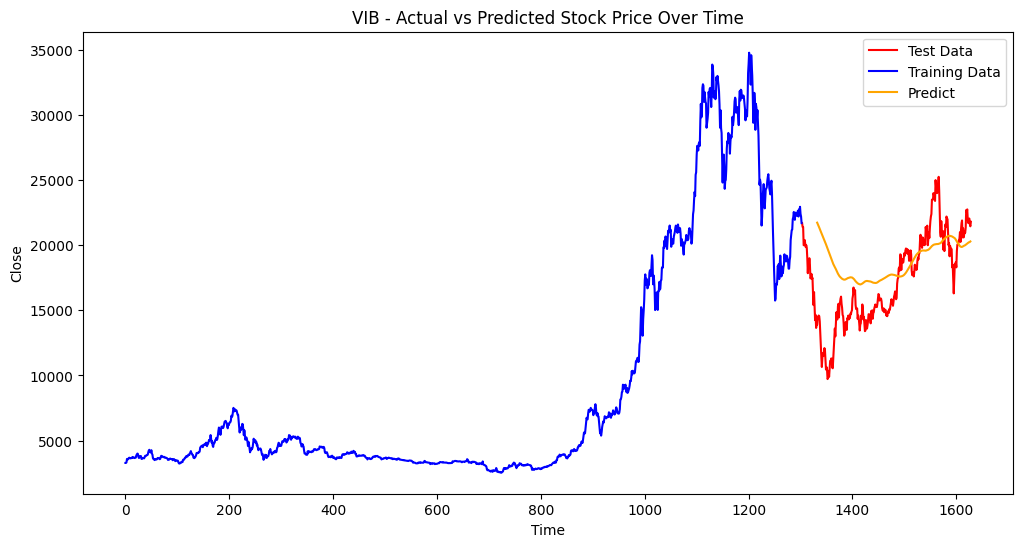

In [45]:
plt.figure(figsize=(12, 6))
n_future = 30

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# # Plot predicted values
#plt.plot( test_Date, y_pred, label='Predicted', linestyle='-',  color='b')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [46]:
n_past = 1
n_days_for_prediction= 60

#print(test_data.reshape(1,-1).T.shape)

test_for_forecast = test_data
print("Test: ", test_for_forecast.shape)

x_forecast = []
y_forecast = []

for i in range(n_days_for_prediction):
  # B1 Duyệt dữ liệu test n ngày gần nhất => bỏ vào x tạm
  x = np.array(test_for_forecast[(-15):])
  print("X shape:",x.shape)
  x = x.reshape(1, x.shape[0], x.shape[1])
  print("X reshape: ",x.shape)

  # B2 dùng predict để chạy 1 ngày
  y = model.predict(x)
  print("Y shape:", y.shape)
  # B3 thêm data ngày đó vào y_forecast, test_for_forecast và append x vào x_forecast
  #y_c = np.repeat(y, train_data.shape[1], axis=-1)
  #print("Y copied:",y_c.shape)
  y_pr = scaler.inverse_transform(y)[:]

  x_forecast.append(x)
  y_forecast.append(y_pr)
  test_for_forecast = np.append(test_for_forecast, y).reshape(-1, 7)
  print(test_for_forecast.shape)
  #test_for_forecast.append(y)
  # B4 lặp lại đến ngày thứ 60

x_forecast = np.array(x_forecast)
y_forecast = np.array(y_forecast)

Test:  (326, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 294ms/step
Y shape: (1, 7)
(327, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(328, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 21ms/step
Y shape: (1, 7)
(329, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 21ms/step
Y shape: (1, 7)
(330, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 21ms/step
Y shape: (1, 7)
(331, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 21ms/step
Y shape: (1, 7)
(332, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(333, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==============================] - 0s 22ms/step
Y shape: (1, 7)
(334, 7)
X shape: (15, 7)
X reshape:  (1, 15, 7)
1/1 [==

In [47]:
print(y_forecast)

[[[-2.87760043e+00  2.09264350e+00 -2.21965809e+01  5.23067360e+01
   -1.68439713e+01 -5.53337842e+03  1.12142100e+04]]

 [[-2.87446451e+00  2.00938463e+00 -2.22578068e+01  5.22105408e+01
   -1.63417816e+01 -5.52867383e+03  1.11885225e+04]]

 [[-2.90092278e+00  1.91470945e+00 -2.24552402e+01  5.15479240e+01
   -1.56811495e+01 -5.52394141e+03  1.11204180e+04]]

 [[-2.98304129e+00  1.84217501e+00 -2.27742882e+01  5.00901680e+01
   -1.52109213e+01 -5.52710254e+03  1.10124473e+04]]

 [[-3.13865519e+00  1.80585027e+00 -2.32269115e+01  4.76516037e+01
   -1.51058598e+01 -5.54456055e+03  1.08641963e+04]]

 [[-3.38422680e+00  1.81841969e+00 -2.38361912e+01  4.40822144e+01
   -1.54720459e+01 -5.58045215e+03  1.06719775e+04]]

 [[-3.70231390e+00  1.86569965e+00 -2.46253223e+01  3.98031235e+01
   -1.62197189e+01 -5.62223486e+03  1.04322148e+04]]

 [[-3.95062947e+00  1.84205973e+00 -2.56039925e+01  3.71795654e+01
   -1.67508087e+01 -5.62968457e+03  1.01736025e+04]]

 [[-4.14661646e+00  1.76272166e+

In [53]:
forecast_sum = y_forecast.sum(axis = -1)
print(forecast_sum.shape)

(60, 1)


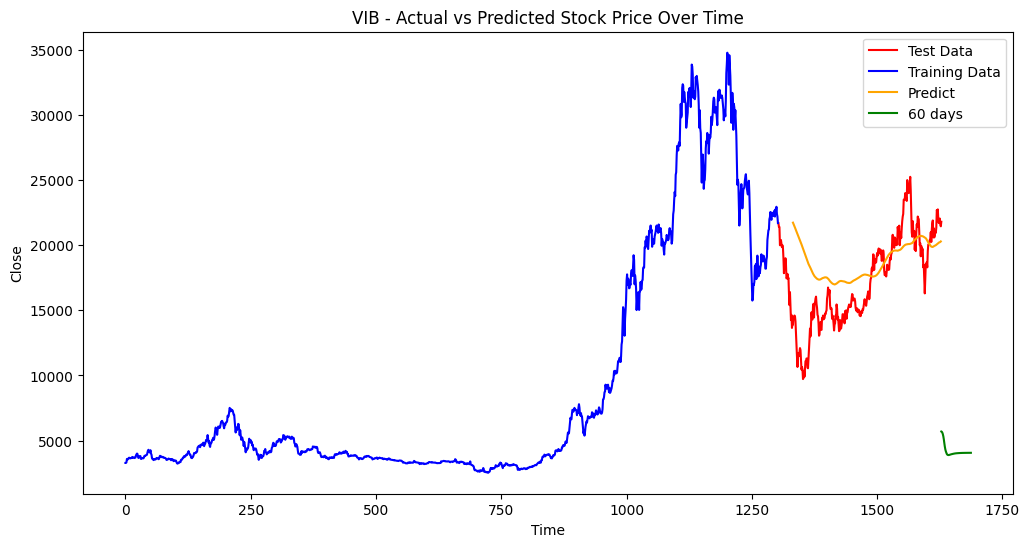

In [49]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(range(train_size, train_size+test_size+1),test_sum, linestyle='-',  color='r', label='Test Data')
plt.plot(range(train_size), train_sum, linestyle='-', color='b', label='Training Data')
#predict_date = Test_data['Time'];
plt.plot(range(train_size+n_future-1, train_size+test_size),  pred_sum, label='Predict', linestyle='-',  color='orange')
# Plot 60 days
plt.plot(range(train_size+test_size, train_size+test_size+60), forecast_sum, linestyle='-', color='green', label='60 days')

plt.title('VIB - Actual vs Predicted Stock Price Over Time')
plt.xlabel('Time')
plt.ylabel('Close')
plt.legend()

plt.show()

In [51]:
def RSME (data1, data2):
    return np.sqrt(np.mean((data1-data2)*(data1-data2)))
def MAE (data1, data2):
    return np.mean(np.absolute(data1-data2))
def MAPE (pred, actual):
    return np.mean(np.absolute((pred-actual)/actual))*100
def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))

print("RSME: ", RSME(pred_sum, test_sum[n_future:]))
print("MAE: ", MAE(pred_sum, test_sum[n_future:]))
print("MAPE: ", MAPE(pred_sum, test_sum[n_future:]))
print("MSLR: ", MSLE(pred_sum, test_sum[n_future:]))

RSME:  3551.331523746445
MAE:  2669.1433369404563
MAPE:  18.602010603959524
MSLR:  0.04984480819983986
